<a href="https://colab.research.google.com/github/johncastillodc/DeepLearning/blob/master/CNN_Marvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de Deep Learning para classificar imagens da Marvel

##Grupo: 
- Marcelo Reis Bohrer
- John Alexander Castillo
###Emails: 
- mrbohrer@edu.unisinos.br
- johnlo@edu.unisinos.br 

## Dataset escolhido: 
https://www.kaggle.com/hchen13/marvel-heroes

## Caracteristicas do dataset:
Arquivos de imagens: 3035 
Classes: 8 (conforme os diretórios)

## Diretórios:
DeepLearning/Marvel/train
- black_widow
- captain_america
- doctor strange
- hulk
- ironman
- loki
- spider_man
- thano

# Carregar dependencias

##Carregar base da Marvel disponibilizada no GitHub público

In [87]:
!git clone https://github.com/johncastillodc/DeepLearning.git

fatal: destination path 'DeepLearning' already exists and is not an empty directory.


## Importar bibliotecas utilizadas

In [88]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import image
from numpy import asarray

import PIL
from PIL import Image

from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input


from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Model, Sequential

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Verificando GPU estão ativadas para o tensorflow

In [89]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## Método para importar arquivos de Treinamento para o Google Colab

Procedimento para carregar todos os arquivos do disco e criar uma dataframe

In [90]:
def carrega_dataframe():

    dados = {
        "ARQUIVO": [],
        "ROTULO": [],
        "ALVO": [],
    }
    root = 'DeepLearning/Marvel/train/'
    caminho_black_widow     = root+"black_widow"
    caminho_captain_america = root+"captain_america"
    caminho_doctor_strange  = root+"doctor_strange"
    caminho_hulk            = root+"hulk"
    caminho_ironman         = root+"ironman"
    caminho_loki            = root+"loki"
    caminho_spider_man      = root+"spider_man"
    caminho_thanos          = root+"thanos"


    black_widow     = os.listdir(caminho_black_widow )
    captain_america = os.listdir(caminho_captain_america )
    doctor_strange  = os.listdir(caminho_doctor_strange )
    hulk            = os.listdir(caminho_hulk )
    spider_man      = os.listdir(caminho_spider_man )    
    ironman         = os.listdir(caminho_ironman )
    loki            = os.listdir(caminho_loki )
    thanos          = os.listdir(caminho_thanos )
 

    for arquivo in black_widow:
        dados["ARQUIVO"].append(f"{caminho_black_widow}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"black_widow")
        dados["ALVO"].append(1)

    for arquivo in captain_america:
        dados["ARQUIVO"].append(f"{caminho_captain_america}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"captain_america")
        dados["ALVO"].append(2)

    for arquivo in doctor_strange:
        dados["ARQUIVO"].append(f"{caminho_doctor_strange}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"doctor_strange")
        dados["ALVO"].append(3)

    for arquivo in hulk:
        dados["ARQUIVO"].append(f"{caminho_hulk}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"hulk")
        dados["ALVO"].append(4)

    for arquivo in spider_man:
        dados["ARQUIVO"].append(f"{caminho_spider_man}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"spider_man")
        dados["ALVO"].append(5)

    for arquivo in ironman:
        dados["ARQUIVO"].append(f"{caminho_ironman}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"ironman")
        dados["ALVO"].append(6)

    for arquivo in loki:
        dados["ARQUIVO"].append(f"{caminho_loki}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"loki")
        dados["ALVO"].append(7)

    for arquivo in thanos:
        dados["ARQUIVO"].append(f"{caminho_thanos}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"thanos")
        dados["ALVO"].append(8)

        
    dataframe = pd.DataFrame(dados)

    return dataframe

In [91]:
dados = carrega_dataframe()

In [92]:
dados

,ARQUIVO,ROTULO,ALVO
0,DeepLearning/Marvel/train/black_widow/pic_259.jpg,black_widow,1
1,DeepLearning/Marvel/train/black_widow/pic_203.jpg,black_widow,1
2,DeepLearning/Marvel/train/black_widow/pic_206.jpg,black_widow,1
3,DeepLearning/Marvel/train/black_widow/pic_377.jpg,black_widow,1
4,DeepLearning/Marvel/train/black_widow/pic_082.jpg,black_widow,1
...,...,...,...
2579,DeepLearning/Marvel/train/thanos/pic_051.jpg,thanos,8
2580,DeepLearning/Marvel/train/thanos/pic_068.jpg,thanos,8
2581,DeepLearning/Marvel/train/thanos/pic_113.jpg,thanos,8
2582,DeepLearning/Marvel/train/thanos/pic_249.jpg,thanos,8


In [93]:
dados['ROTULO'].value_counts()

doctor_strange     345
spider_man         326
captain_america    324
thanos             323
hulk               321
black_widow        320
ironman            318
loki               307
Name: ROTULO, dtype: int64

In [94]:
dados['ROTULO'].unique()

array(['black_widow', 'captain_america', 'doctor_strange', 'hulk',
       'spider_man', 'ironman', 'loki', 'thanos'], dtype=object)

In [95]:
dados.columns

Index(['ARQUIVO', 'ROTULO', 'ALVO'], dtype='object')

## Salvar o dataframe em arquivo csv

In [96]:
dados.to_csv("DeepLearning/Marvel/train/imagens-marvel.csv")

Como o dataframe já foi salvo em arquivo .csv não há necessidade de rodar os procedimentos para criação do dataframe. Basta ler o arquivo .csv criado e seguir deste ponto.

# Leitura dos dados

In [97]:
dados = pd.read_csv("DeepLearning/Marvel/train/imagens-marvel.csv")

In [98]:
dados.head(10000)

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,DeepLearning/Marvel/train/black_widow/pic_259.jpg,black_widow,1
1,1,DeepLearning/Marvel/train/black_widow/pic_203.jpg,black_widow,1
2,2,DeepLearning/Marvel/train/black_widow/pic_206.jpg,black_widow,1
3,3,DeepLearning/Marvel/train/black_widow/pic_377.jpg,black_widow,1
4,4,DeepLearning/Marvel/train/black_widow/pic_082.jpg,black_widow,1
...,...,...,...,...
2579,2579,DeepLearning/Marvel/train/thanos/pic_051.jpg,thanos,8
2580,2580,DeepLearning/Marvel/train/thanos/pic_068.jpg,thanos,8
2581,2581,DeepLearning/Marvel/train/thanos/pic_113.jpg,thanos,8
2582,2582,DeepLearning/Marvel/train/thanos/pic_249.jpg,thanos,8


In [99]:
dados['ALVO'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

Procedimento para seleção de dados aleatoriamente

## Cria dataframe com 200 exemplos aleatorios 

In [100]:
num_samples = 200
samples = []

for category in dados['ROTULO'].unique():
    category_slice = dados.query("ROTULO == @category")
    samples.append(category_slice.sample( num_samples, random_state=1, replace=True  ))

dados = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dados['ROTULO'].value_counts()


thanos             200
loki               200
ironman            200
spider_man         200
hulk               200
doctor_strange     200
black_widow        200
captain_america    200
Name: ROTULO, dtype: int64

In [101]:
print('Training data shape : ', dados.shape)
print('Testing data shape. : ', dados.shape)

Training data shape :  (1600, 4)
Testing data shape. :  (1600, 4)


In [102]:
dados["ROTULO"].unique()

array(['black_widow', 'loki', 'doctor_strange', 'thanos', 'ironman',
       'captain_america', 'spider_man', 'hulk'], dtype=object)

In [103]:
dados.head(4)

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,302,DeepLearning/Marvel/train/black_widow/pic_394.jpg,black_widow,1
1,1997,DeepLearning/Marvel/train/loki/pic_118.jpg,loki,7
2,773,DeepLearning/Marvel/train/doctor_strange/pic_1...,doctor_strange,3
3,2154,DeepLearning/Marvel/train/loki/pic_280.jpg,loki,7


## Método para importar arquivos de Válidos para o Google Colab

In [104]:
def carrega_Validdataframe():

    dadosv = {
        "ARQUIVO": [],
        "ROTULO": [],
        "ALVO": [],
    }
    rootv = 'DeepLearning/Marvel/valid/'
    caminho_black_widow     = rootv+"black_widow"
    caminho_captain_america = rootv+"captain_america"
    caminho_doctor_strange  = rootv+"doctor_strange"
    caminho_hulk            = rootv+"hulk"
    caminho_ironman         = rootv+"ironman"
    caminho_loki            = rootv+"loki"
    caminho_spider_man      = rootv+"spider_man"
    caminho_thanos          = rootv+"thanos"


    black_widow     = os.listdir(caminho_black_widow )
    captain_america = os.listdir(caminho_captain_america )
    doctor_strange  = os.listdir(caminho_doctor_strange )
    hulk            = os.listdir(caminho_hulk )
    spider_man      = os.listdir(caminho_spider_man )    
    ironman         = os.listdir(caminho_ironman )
    loki            = os.listdir(caminho_loki )
    thanos          = os.listdir(caminho_thanos )
 

    for arquivo in black_widow:
        dadosv["ARQUIVO"].append(f"{caminho_black_widow}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"black_widow")
        dadosv["ALVO"].append(1)

    for arquivo in captain_america:
        dadosv["ARQUIVO"].append(f"{caminho_captain_america}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"captain_america")
        dadosv["ALVO"].append(2)

    for arquivo in doctor_strange:
        dadosv["ARQUIVO"].append(f"{caminho_doctor_strange}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"doctor_strange")
        dadosv["ALVO"].append(3)

    for arquivo in hulk:
        dadosv["ARQUIVO"].append(f"{caminho_hulk}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"hulk")
        dadosv["ALVO"].append(4)

    for arquivo in spider_man:
        dadosv["ARQUIVO"].append(f"{caminho_spider_man}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"spider_man")
        dadosv["ALVO"].append(5)

    for arquivo in ironman:
        dadosv["ARQUIVO"].append(f"{caminho_ironman}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"ironman")
        dadosv["ALVO"].append(6)

    for arquivo in loki:
        dadosv["ARQUIVO"].append(f"{caminho_loki}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"loki")
        dadosv["ALVO"].append(7)

    for arquivo in thanos:
        dadosv["ARQUIVO"].append(f"{caminho_thanos}{os.sep}{arquivo}")
        dadosv["ROTULO"].append(f"thanos")
        dadosv["ALVO"].append(8)

        
    dataframev = pd.DataFrame(dadosv)

    return dataframev

In [105]:
dadosv = carrega_Validdataframe()

In [106]:
dadosv

,ARQUIVO,ROTULO,ALVO
0,DeepLearning/Marvel/valid/black_widow/pic_053.jpg,black_widow,1
1,DeepLearning/Marvel/valid/black_widow/pic_357.jpg,black_widow,1
2,DeepLearning/Marvel/valid/black_widow/pic_336.jpg,black_widow,1
3,DeepLearning/Marvel/valid/black_widow/pic_191.jpg,black_widow,1
4,DeepLearning/Marvel/valid/black_widow/pic_006.jpg,black_widow,1
...,...,...,...
446,DeepLearning/Marvel/valid/thanos/pic_009.jpg,thanos,8
447,DeepLearning/Marvel/valid/thanos/pic_350.jpg,thanos,8
448,DeepLearning/Marvel/valid/thanos/pic_236.jpg,thanos,8
449,DeepLearning/Marvel/valid/thanos/pic_330.jpg,thanos,8


In [107]:
dadosv['ROTULO'].value_counts()

doctor_strange     61
spider_man         57
captain_america    57
hulk               56
ironman            56
thanos             55
black_widow        55
loki               54
Name: ROTULO, dtype: int64

## Separação dos dados em treinamento e teste

In [109]:
train_df=dados
test_df=dadosv

In [110]:
train_df['ALVO'].count()

1600

In [111]:
test_df['ALVO'].count()

451

Image Augmentation on the fly using Keras ImageDataGenerator!

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [112]:
data_path = './'

datagen   = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

train_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='training',
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)

valid_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='validation',
                                            classes=None,
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)


test_generator=datagen.flow_from_dataframe(dataframe=test_df,
                                            directory=(data_path),
                                            x_col='ARQUIVO',
                                            y_col='ROTULO',
                                            subset='validation',
                                            classes=None,
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            validate_filenames=False)



Found 1280 non-validated image filenames belonging to 8 classes.
Found 320 non-validated image filenames belonging to 8 classes.
Found 90 non-validated image filenames belonging to 8 classes.


# Árvore de Decisão

In [113]:
labels = dados["ROTULO"].unique()
labels.shape

(8,)

In [114]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150000)
X= cv.fit_transform(train_df.iloc[:,1]).toarray()
y= train_df.iloc[:,3]
X.shape, y.shape

((1600, 416), (1600,))

Separar dados em treino e teste para Árvore de decisão

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1120, 416), (1120,), (480, 416), (480,))

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
# criação do modelo Árvode de decisão
modelo = ExtraTreesClassifier( criterion='gini')

In [118]:
modelo.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [119]:
# Acurácia do modelo
# y_teste estão as classificações corretas 
# score = compara os dados de testes com os dados de treino (modelo rodou para os dados de treino) 
resultado = modelo.score(X_test, y_test)

print('Acurácia =', resultado)


Acurácia = 1.0


In [120]:
y_pred = modelo.predict(X_test)

## Fazendo a matriz de confusão 

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 69,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61]])

## Fazendo a matriz de confusão detalhada


In [122]:
print(pd.crosstab(y_test, y_pred, rownames=['Reais'],colnames=['Preditos'], margins=True))

Preditos   1   2   3   4   5   6   7   8  All
Reais                                        
1         64   0   0   0   0   0   0   0   64
2          0  66   0   0   0   0   0   0   66
3          0   0  69   0   0   0   0   0   69
4          0   0   0  56   0   0   0   0   56
5          0   0   0   0  61   0   0   0   61
6          0   0   0   0   0  52   0   0   52
7          0   0   0   0   0   0  51   0   51
8          0   0   0   0   0   0   0  61   61
All       64  66  69  56  61  52  51  61  480


# CNN - Deep Learning - Arquitetura A

Criei duas arquiteturas de modelos A e B
Se executar a arquitetura A não executar a arquitetura B

Se executar a arquitetura B não executar a arquitetura A (célula abaixo), pular para célula da arq. A



In [123]:
model = Sequential()

# Primeira camada convolution 
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=train_generator.image_shape, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

# Segunda camada convolution 
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# terceira camada convolution 
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(8, activation='softmax'))


In [124]:
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
# importar biblioteca para calculo de métricas
from sklearn.metrics import mean_squared_error

Criação do modelo


Funções de ativação 

https://keras.io/api/layers/activations/#available-activations



Otimizadores utilizados na compilação do modelo

 https://keras.io/api/optimizers/


Métricas 

 https://keras.io/api/metrics/



# CNN - Deep Learning - Arquitetura B

Se a arquitetura A foi criada, não executar a célula abaixo

In [126]:
model = Sequential()

# camada de entrada
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_generator.image_shape))
model.add(Activation('relu'))


# primeira camada oculta
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# segunda camanda oculta
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# terceira camanda oculta
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())

# camada de saida (deve ter número de classes definida)
model.add(Dense(8, activation='softmax')) 


In [127]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 64)     

# Compilando o modelos com outros otimizadores

In [128]:
#  https://keras.io/api/optimizers/

model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile( optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam"), loss='categorical_crossentropy',  metrics=['accuracy'])
#model.compile( optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"), loss='categorical_crossentropy',  metrics=['accuracy'])
#model.compile( optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"), loss='categorical_crossentropy',  metrics=['accuracy'])


In [129]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

40 10


In [130]:
history = model.fit(train_generator, y=None, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator,  validation_steps=STEP_SIZE_VALID, epochs=10)

Epoch 1/10
40/40 [==============================] - 60s 629ms/step - loss: 7.0909 - accuracy: 0.1320 - val_loss: 2.2325 - val_accuracy: 0.1187
Epoch 2/10
40/40 [==============================] - 24s 609ms/step - loss: 1.8595 - accuracy: 0.3026 - val_loss: 1.9158 - val_accuracy: 0.3250
Epoch 3/10
40/40 [==============================] - 25s 613ms/step - loss: 1.4408 - accuracy: 0.5366 - val_loss: 1.7503 - val_accuracy: 0.3844
Epoch 4/10
40/40 [==============================] - 25s 617ms/step - loss: 0.9537 - accuracy: 0.7631 - val_loss: 1.7610 - val_accuracy: 0.4250
Epoch 5/10
40/40 [==============================] - 25s 610ms/step - loss: 0.5890 - accuracy: 0.8820 - val_loss: 1.7304 - val_accuracy: 0.4563
Epoch 6/10
40/40 [==============================] - 25s 618ms/step - loss: 0.3212 - accuracy: 0.9402 - val_loss: 1.7193 - val_accuracy: 0.4656
Epoch 7/10
40/40 [==============================] - 25s 613ms/step - loss: 0.2104 - accuracy: 0.9660 - val_loss: 3.0763 - val_accuracy: 0.3812

In [131]:
test_eval = model.evaluate(test_generator, verbose=1)

print('Test loss:'    , test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 2s 874ms/step - loss: 2.6671 - accuracy: 0.2333
Test loss: 2.6670989990234375
Test accuracy: 0.23333333432674408


Observamos ocorrência de Overffiting 

O algoritmo “presta muita atenção” nas particularidades dos dados de treinamento e não consegue generalizar muito bem.



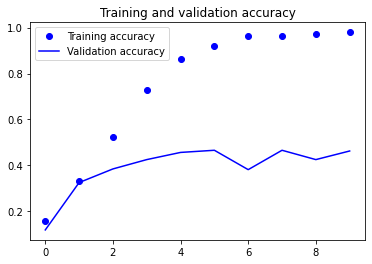

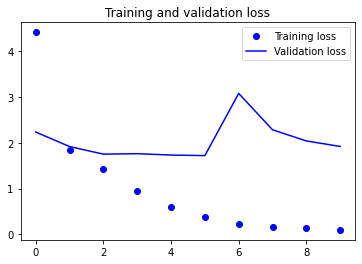

In [132]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss      = history.history['loss']
val_loss  = history.history['val_loss']
epochs    = range(len(accuracy))


plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

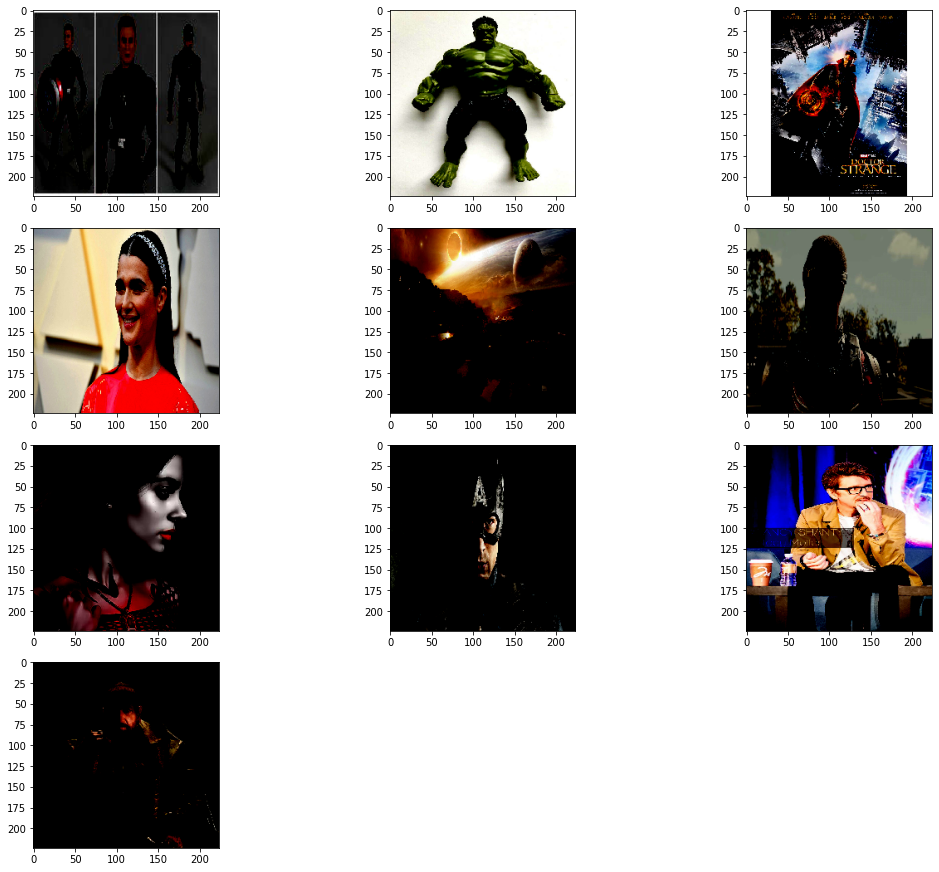

In [133]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Salvar Arquitetura do Modelo em arquivo de imagem

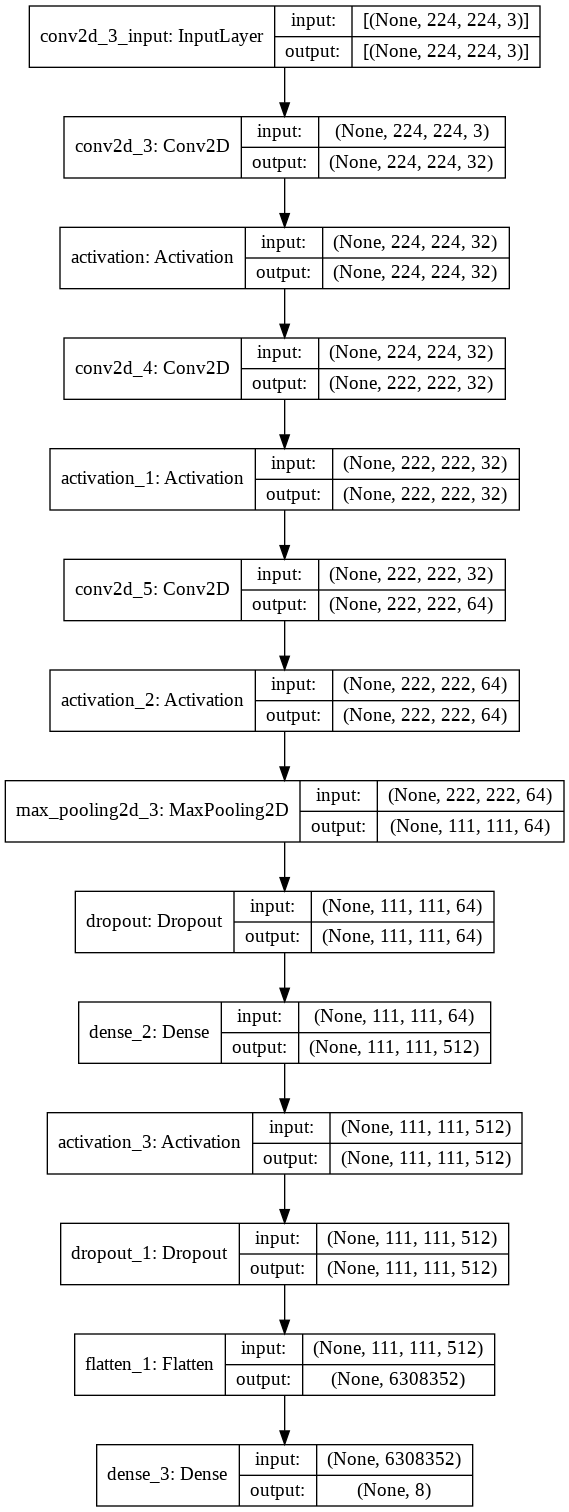

In [134]:
dot_img_file = 'DeepLearning/Marvel/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [135]:
results = model.evaluate( test_generator, verbose=1)
predictions = np.argmax(model.predict(test_generator), axis=1)

class_names = list(test_generator.class_indices.keys())

clr = classification_report(test_generator.labels, predictions, labels=np.arange(8), target_names=class_names)

print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print('')
print("Classification Report:\n----------------------\n", clr)


3/3 [==============================] - 1s 352ms/step - loss: 2.6671 - accuracy: 0.2333
Test Accuracy: 23.33%

Classification Report:
----------------------
                  precision    recall  f1-score   support

    black_widow       0.60      0.16      0.26        55
captain_america       0.53      0.23      0.32        35
 doctor_strange       0.00      0.00      0.00         0
           hulk       0.00      0.00      0.00         0
        ironman       0.00      0.00      0.00         0
           loki       0.00      0.00      0.00         0
     spider_man       0.00      0.00      0.00         0
         thanos       0.00      0.00      0.00         0

       accuracy                           0.19        90
      macro avg       0.14      0.05      0.07        90
   weighted avg       0.57      0.19      0.28        90



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


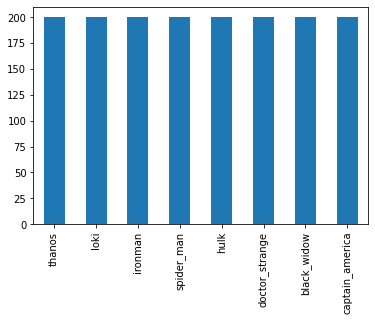

In [136]:
dados['ROTULO'].value_counts().plot.bar()

In [137]:
y_pred = model.predict(test_generator)
y_pred

array([[2.94391066e-02, 3.23955148e-01, 1.52173340e-01, 2.94682067e-02,
        1.18243983e-02, 4.88336338e-03, 1.23124060e-04, 4.48133349e-01],
       [4.60515678e-01, 7.51172006e-02, 1.31305054e-01, 4.92680930e-02,
        7.15647042e-02, 9.18689072e-02, 2.42571384e-02, 9.61033031e-02],
       [5.46039024e-04, 2.48923764e-01, 3.19990255e-02, 4.61280376e-01,
        3.51732932e-02, 1.70912198e-03, 1.66551000e-03, 2.18702838e-01],
       [2.85184244e-03, 8.47752869e-01, 5.03613707e-03, 1.46155795e-02,
        2.49897316e-02, 5.80672994e-02, 4.15065885e-02, 5.17996075e-03],
       [2.20476044e-03, 5.32010512e-04, 6.65321425e-02, 1.46119331e-03,
        1.40173119e-02, 4.19606193e-04, 5.65309674e-05, 9.14776564e-01],
       [1.36231899e-01, 3.21909674e-02, 2.10747402e-02, 9.92111564e-02,
        2.31053624e-02, 5.40095806e-01, 3.42707634e-02, 1.13819279e-01],
       [3.44930202e-01, 7.95007404e-03, 1.67960618e-02, 2.10162103e-02,
        2.46454403e-02, 4.99822319e-01, 8.30090195e-02, 1.